# NAME :- ANAND GEED
# ROLL NO :- IDS2022005

We define some libraries to help us in the manipulation the data set, such as numpy, matplotlib, seaborn and scikit-learn. In this code, we implement a Multilayer Perceptron without any framework like Keras or similar ones. The goal here is to be as simple as possible! So to get help with this task, we implement the neural network without using ready-made libraries. We can use numpy to work with array operations.

In [ ]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

seaborn.set(style='whitegrid'); seaborn.set_context('talk')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

One of the first steps when working with a new data set is preprocessing. Our data here is of Diabetes.

In [ ]:
data = pd.read_csv("Dataset of Diabetes .csv")
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
data.shape

(1000, 14)

In [ ]:
data["CLASS"].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(1000, 14)

Transforming the data from categorical to numerical

In [ ]:
data["CLASS"] = data.CLASS.map({"N" : int(0), "Y" : int(1), "P" : 2, "N " : 0, "Y " : 1})
data["Gender"] = data.Gender.map({"F" : int(0), "M" : int(1)})
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1.0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0.0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1.0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


An easy to quickly get an idea for how your data looks is to examine the shape of the matrix it's stored using the .shape attribute of numpy arrays. We see that the shape of data is 1000 x 14. Which tells us 1000 rows and 14 columns.

In [ ]:
data.shape

(1000, 14)

In [ ]:
data.isnull().sum().sum()

1

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data["CLASS"].value_counts()

1    843
0    103
2     53
Name: CLASS, dtype: int64

In [ ]:
label = data["CLASS"]
data.drop(["CLASS", "ID"], inplace=True, axis=1)

In [ ]:
label1 = pd.DataFrame(label)
label1.head()

,CLASS
0,0
1,0
2,0
3,0
4,0


In [ ]:
label2 = pd.get_dummies(label1, columns = ['CLASS'])
label2.head()

,CLASS_0,CLASS_1,CLASS_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
label4 = np.array(label2)
label4

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

Normalization of the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
normalized_data  = pd.DataFrame(scaler.transform(data))
normalized_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000237,0.0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.000452,1.0,0.101695,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.000634,0.0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.001160,0.0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.000452,1.0,0.220339,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565


splitting the data into train and test (20% for the test and rest for train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_data, label, test_size=0.20, random_state=42)

defining sigmoid function and its derivative 

In [ ]:
x = 0 
ativation = {(lambda x: 1/(1 + np.exp(-x)))}
deriv = {(lambda x: x*(1-x))}

defining tanh function and its derivative

In [ ]:
activation_tang = {(lambda x: np.tanh(x))}
deriv_tang = {(lambda x: 1-x**2)}

defining relu function and its derivative

In [ ]:
activation_ReLU = {(lambda x: x*(x > 0))}
deriv_ReLU = {(lambda x: 1 * (x>0))}

#Multilayer Perceptron: final form#
Everything that's been outlined suffices for running the MLP. However, as it stands things are still quite clunkly. We can clean everything up by wrapping all this code into a Python Class.

Our original function defintions have been slightly changed to help some of the properties of having a class structure. A number of new functions, such as predict and evaluate, have been defined in the MLP class

In this mlp model i used 12 neuron in  layer because my input data dimension is 12 and 9 neuron in the hidden layer and 3 neuron in output layer because there are 3 output categories. the function which we used in out mlp model are tanh, relu and sigmoid. in the obove code first we i intialized the weights and the i am running 700 epochs and  i did forward propogation and then i did backpropogation to find out the optimal weights and with the help of predict function i am gonna predict the output for the X_test

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    params={}
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 12                     # Input Layer
            self.hiddenLayer = 9                    # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0: 
                array_score.append([i,  my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i,  my_predictions[i], y[i]])
        try:
          dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        except:
          dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output'])

        return my_predictions, dataframe

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
                elif(y[idx] == 2):
                    self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)
        
        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

In [ ]:
def show_test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "--",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "--",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("% Hits")
    plt.title("Number of Hidden Layers - Performance")
    
    ep2 = [0,100,200,300,400,500,600,700]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")
    
    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('% Hits')
    plt.title('Hits - Activation Functions')
    plt.show()

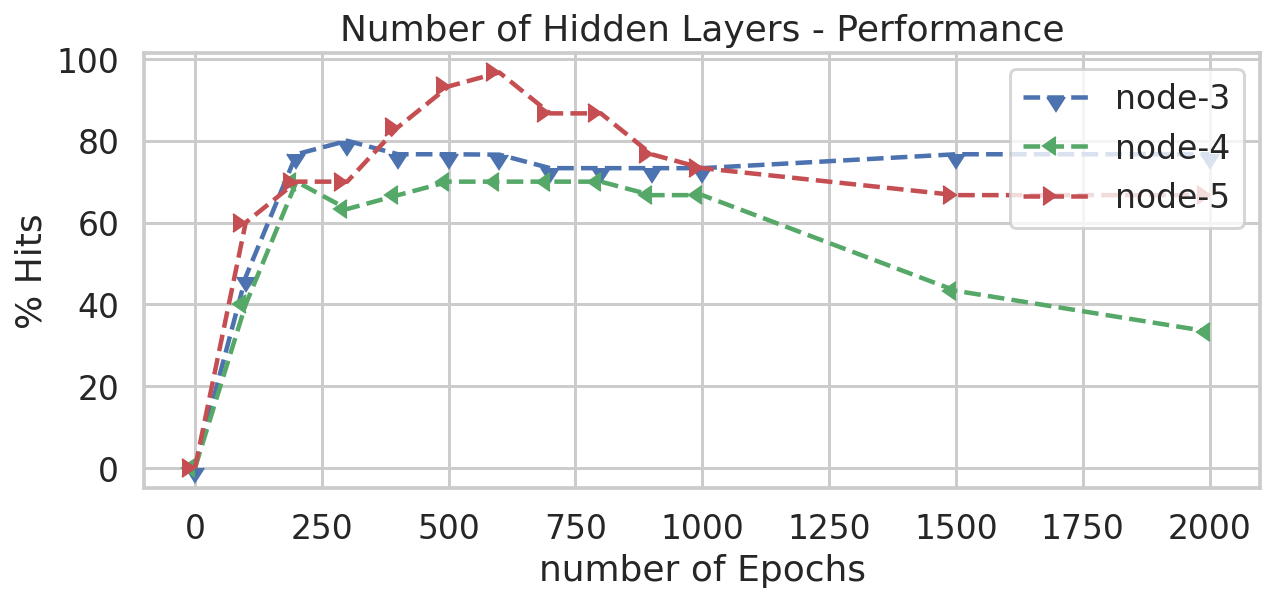

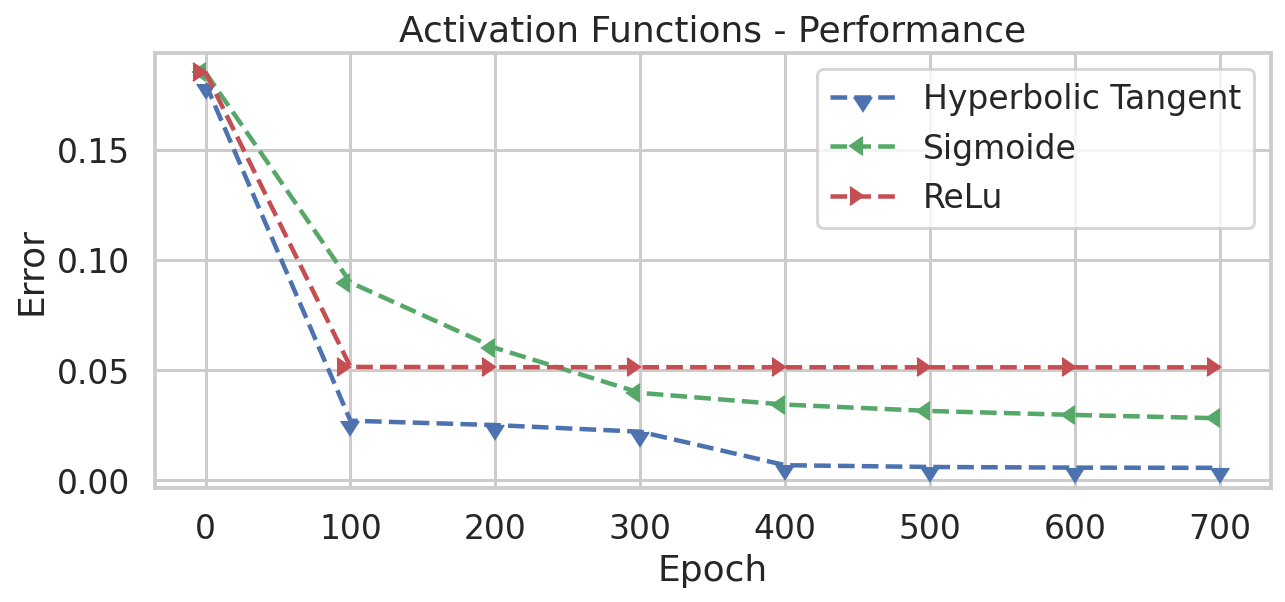

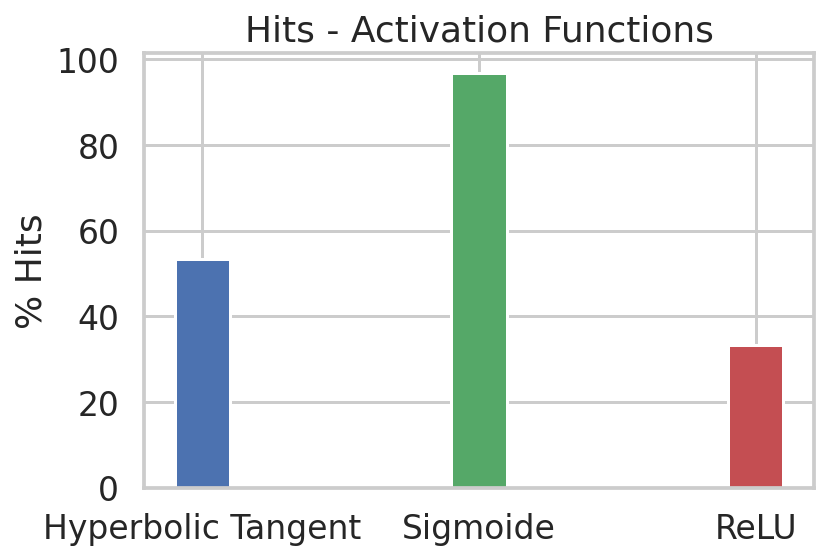

In [ ]:
show_test()

#Training the Artificial Neural Network(MLP)
training our MultiLayer Perceptron

Epoch  1 - Total Error:  0.0710466477797179
Epoch  50 - Total Error:  0.02903262241964869
Epoch  100 - Total Error:  0.028543473098699465
Epoch  150 - Total Error:  0.027996003864887056
Epoch  200 - Total Error:  0.027400075843854572
Epoch  250 - Total Error:  0.02678629611438486
Epoch  300 - Total Error:  0.026192001392844742
Epoch  350 - Total Error:  0.025645102695457004
Epoch  400 - Total Error:  0.02515778961071046
Epoch  450 - Total Error:  0.02473058082170477
Epoch  500 - Total Error:  0.024358402662494165
Epoch  550 - Total Error:  0.024034265787405848
Epoch  600 - Total Error:  0.023750842718155037
Epoch  650 - Total Error:  0.023501150528159383
Epoch  700 - Total Error:  0.02327892170391559


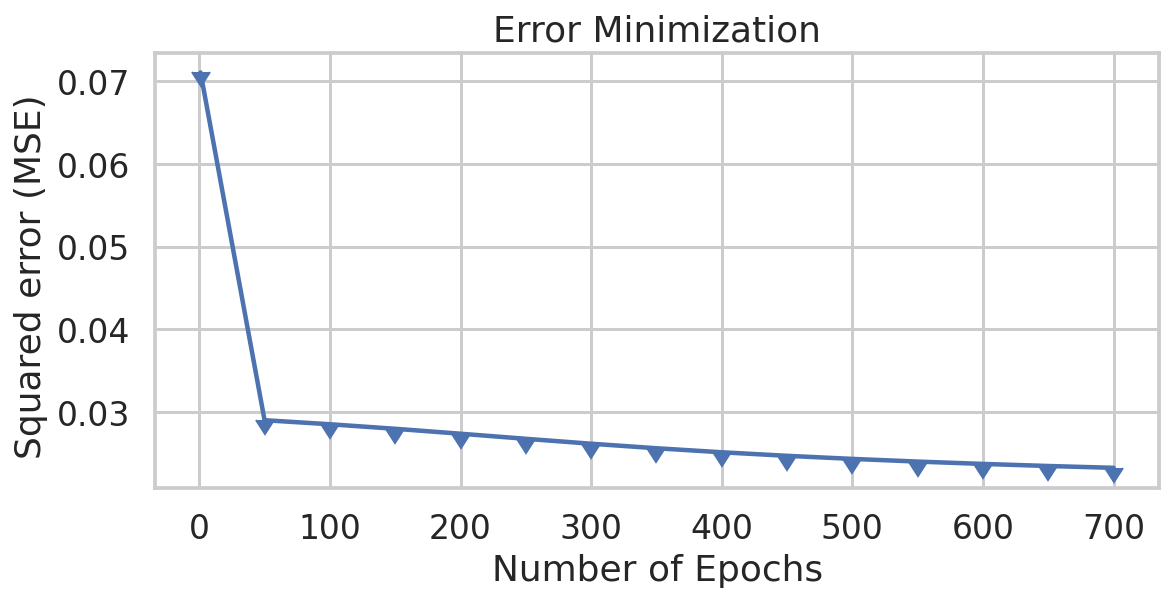

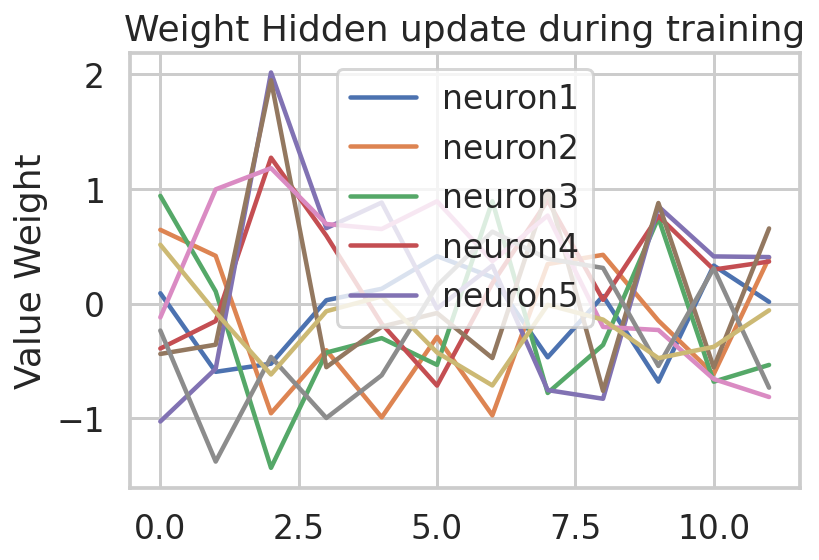

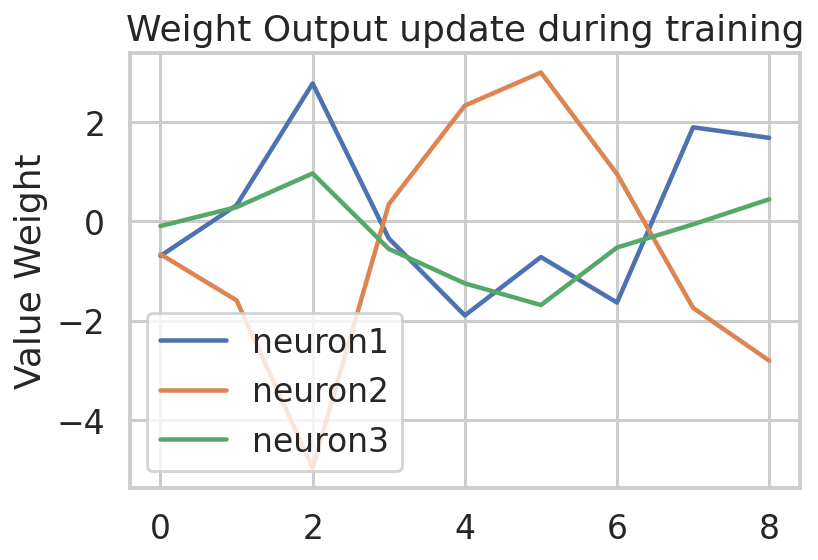

MultiLayerPerceptron(params={})

In [ ]:
dictionary = {'InputLayer':12, 'HiddenLayer':9, 'OutputLayer':3,
              'Epocas':700, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'sigmoid'}

Perceptron = MultiLayerPerceptron(dictionary)
Perceptron.fit(np.array(X_train), np.array(y_train))

The purpose of this data is to evaluate the generizability of our model. We expect our model to perform well on our training data, because of course the objective of our optimization is to minimize the error with respect to the training data, but we'd like our model to generalize to new, never before seen, data. We therefore evaluate the accuracy and loss on a hold-out set which the model never sees during training. If the performance is good on this hold-out set we can be confident that our model is generalizing well, meaning we've mananged to generally teach a computer to read hand-writing.

In [ ]:
prev, dataframe = Perceptron.predict(np.array(X_test), np.array(y_test))

In [ ]:
hits = n_N = n_Y = n_P = 0
score_N = score_Y = score_P = 0
y_test = np.array(y_test)
for j in range(len(y_test)):
  if(y_test[j] == 0): 
    n_N += 1
  elif(y_test[j] == 1): 
    n_Y += 1
  elif(y_test[j] == 2): 
      n_P += 1
        
for i in range(len(y_test)):
  if y_test[i] == prev[i]: 
    hits += 1
  if y_test[i] == prev[i] and y_test[i] == 0:
    score_N += 1
  elif y_test[i] == prev[i] and y_test[i] == 1:
    score_Y += 1
  elif y_test[i] == prev[i] and y_test[i] == 2:
    score_P += 1    
         
hits = (hits / len(y_test)) * 100
faults = 100 - hits

In [ ]:
dataframe

,_id,class,output
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
195,195,1,0
196,196,1,0
197,197,1,1
198,198,1,1
